# Exploring Graduate Employment Outcomes
In this analysis we are going to be looking through data pertaining to employment outcomes for college students who graduated between years 2010 - 2012 in the United States. Our objectives from this exercise are as follows:
- Discovering if students in more popular majors have higher average incomes
- Exploring the relationship between gender and average income
- Analyzing the connection between major type, employment status, and average income

These objectives will be elaborated on further in their independent sections.


## Table of Contents
[Introduction to the Data](#Introduction-to-the-Data)

[Cleaning the Data](#2)

[Objectives](#3)

- [Discovering if Students in more Popular Majors Have Higher Average Incomes](#4)
- [Exploring the Relationship Between Gender and Average Income](#5)
- [Analyzing the Connection Between Major Type, Employment Status, and Average income](#6)

[Conclusions](#7)

## Introduction to the Data

The data was collected by [The American Community Survey](https://www.census.gov/programs-surveys/acs/) and was cleaned then [released by fivethirtyeight on Github](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row of the data represents a different major. The rows are ranked and ordered by median salary income. The column headers and definitions are displayed in a '__Header__ - Description' format below:
 
- __Rank__ - Rank by median earnings
- __Major_code__ - Major code, FO1DP in ACS PUMS
- __Major__ - Major description
- __Major_category__ - Category of major from Carnevale et al
- __Total__ - Total number of people with major
- __Sample_size__ - Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
- __Men__ - Male graduates
- __Women__ - Female graduates
- __ShareWomen__ - Women as share of total
- __Employed__ - Number employed (ESR == 1 or 2)
- __Full_time__ - Employed 35 hours or more
- __Part_time__ - Employed less than 35 hours
- __Full_time_year_round__ - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
- __Unemployed__ - Number unemployed (ESR == 3)
- __Unemployment_rate__ - Unemployed / (Unemployed + Employed)
- __Median__ - Median earnings of full-time, year-round workers
- __P25th__ - 25th percentile of earnings
- __P75th__ - 75th percentile of earnings
- __College_jobs__ - Number with job requiring a college degree
- __Non_college_jobs__ - Number with job not requiring a college degree
- __Low_wage_jobs__ - Number in low-wage service jobs
    
First, we will import the necessary function libraries (Pandas, matplot, etc.), import the dataset as variable name 'grad_data', then we will display the first and last five rows of our dataset, and finally we will utilize the .describe() method to view statistical information of our columns.

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [398]:
grad_data = pd.read_csv(r'C:\Users\bbeckenb\OneDrive\Documents\Local Datasets\recent-grads.csv', encoding="Windows-1252")
grad_data.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [399]:
grad_data.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [400]:
grad_data.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


<a id="2"></a>
## Cleaning the Data
We can see most every column has 173 values except for 'Total', 'Men', 'Women', and 'ShareWomen' so we will identify and drop rows with missing data. Otherwise our columns will not match up and this would create errors using some methods later in the analysis. 

Below we will store the row count for each column of the raw data in variable 'raw_data_count', we will then drop rows containing null values using the '.dropna()' method. Finally we will store the new row count for each column in variable 'clean_data_count'.

In [401]:
raw_data_count = grad_data.count()
grad_data = grad_data.dropna()
clean_data_count = grad_data.count()

In [402]:
raw_data_count

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   172
Major_category          173
ShareWomen              172
Sample_size             173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       173
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64

In [403]:
clean_data_count

Rank                    172
Major_code              172
Major                   172
Total                   172
Men                     172
Women                   172
Major_category          172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64

In [404]:
grad_data.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


As we can see, we have a uniform 172 rows across all columns. Now we can begin to explore and visualize the data. 

<a id="3"></a>
## Objectives
As a refresher, our objectives are as follows:
- Discovering if students in more popular majors have higher average incomes
- Exploring the relationship between gender and average income
- Analyzing the connection between major type, employment status, and average income  

Analysis for each objective will be broken into sections below. We will be utilizing the functions built below to provide capability to draw a best-fit line for scatterplots (y_pred) and calculating how close the data is to this line using the coefficient of determination (R_squared).

In [405]:
def y_pred(X, y):
    denominator = X.dot(X) - X.mean() * X.sum()
    m = (X.dot(y) - y.mean() * X.sum()) / denominator
    b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator
    y_pred = m*X + b
    return y_pred

def R_squared(X, y):
    res = y - y_pred(X, y)
    tot = y - y.mean()
    R_squared = 1 - res.dot(res) / tot.dot(tot)
    print(round(100*R_squared, 2), '% of the variation in y can be explained using X')

<a id="4"></a>
### Discovering if Students in more Popular Majors Have Higher Average Incomes
The first question we are looking to answer is if students in more popular majors have higher average incomes. We must first interpret what 'popularity' means and how we gauge that so that our analysis makes sense. Popularity, in this sense, will mean a large magnitude of people practice this major. To build on that definition, a major with a higher total number of graduates is to be considered more popular.

We have two columns that help us compare popularity between majors:
- __Total__ - Total number of people with major
- __Sample_size__ - Sample size (unweighted) of full-time, year-round ONLY (used for earnings)

So we have the total number of people with the major which is a more holistic view including, full-time, part-time, and unemployed members. We also have our Sample_size column which is more focused on full-time year round employed members specifically for earnings measurement. 

Below, we will generate scatterplots to visualize the following correlations:
1. Sample_size and Total
2. Sample_size and Median Salary
3. Total and Median Salary

<AxesSubplot:title={'center':'Total vs Median Salary'}, xlabel='Total', ylabel='Median'>

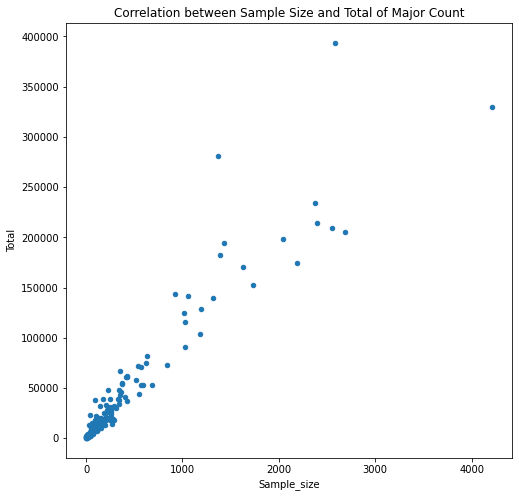

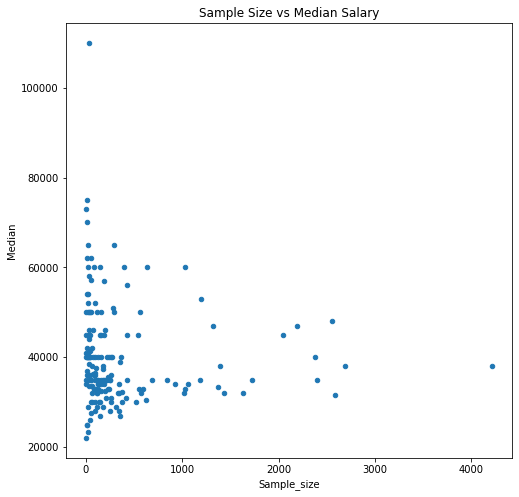

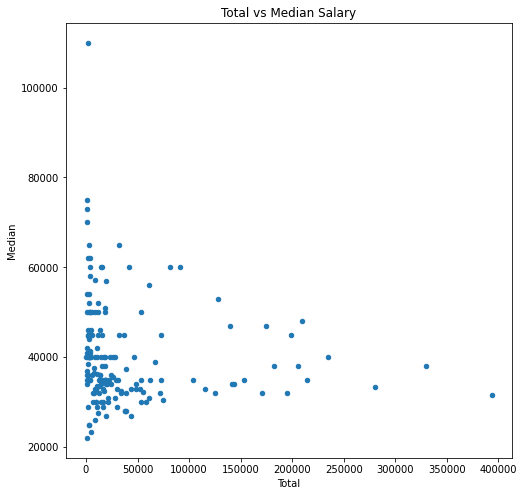

In [406]:
grad_data.plot(x='Sample_size', y='Total', kind='scatter', title='Correlation between Sample Size and Total of Major Count', figsize=(8,8))
grad_data.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs Median Salary', figsize=(8,8))
grad_data.plot(x='Total', y='Median', kind='scatter', title='Total vs Median Salary', figsize=(8,8))

From the first scatterplot, comparing the sample size versus the total number for each major count, we can see there is a positive correlation: having a higher total, typically, yields a larger sample size, and thus, 'Sample_size' has a strong correlation to 'Total' and to our definition of popularity. 

With our current view the plots comparing our popularity metrics to median salary, we see:
1. The higher our popularity metrics go, there is no consistent pattern of higher median salaries, especially with the average median salary for the dataset being just over 40,000 dollars. 
2. The data points with lower sample sizes (<1000 people) yield a high amount of volatility as they range between about 20,000 and 110,000 dollars on the Median Salary scale. We would expect less reliability in an accurate median as our sample size decreases. 
3. The bulk of our data points lie in the lower 25% of the magnitudes of our popularity metrics (Sample_size and Total). The majority of these points are in the 20,000 to 40,000 dollar range. 
    
These scatterplots provide no discernible relationship between higher popularity of these majors and the reported median salaries. Just to be sure, we are going to run a filter on the Sample_size data to zoom in on data with sample sizes under 1000 (the bottom 25%). This contains a bulk of the data and may provide a viewpoint where more can be deduced.

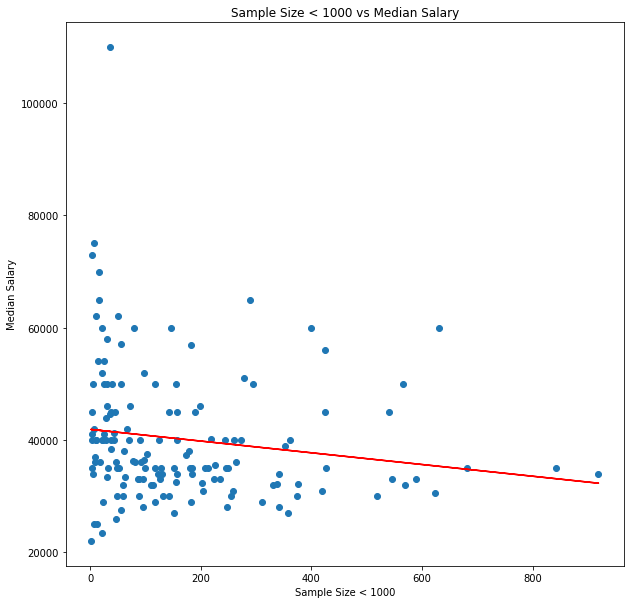

In [407]:
sample_size_filter = grad_data.loc[:, 'Sample_size'] < 1000
sample_under_1000 = grad_data.loc[sample_size_filter, 'Sample_size']
median_sample_under_1000 = grad_data.loc[sample_size_filter, 'Median']
# sample_under_1000.count()
# median_sample_under_1000.count()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(sample_under_1000, median_sample_under_1000)
ax.set_xlabel('Sample Size < 1000')
ax.set_title('Sample Size < 1000 vs Median Salary')
ax.set_ylabel('Median Salary')
ax.plot(sample_under_1000, y_pred(sample_under_1000, median_sample_under_1000), 'r')

In [408]:
R_squared(sample_under_1000, median_sample_under_1000)

2.41 % of the variation in y can be explained using X


Our filter (sample sizes under 1000) left us with 152 data points. Zooming in on the data points where the Sample Size is <1000, we can see the best-fit line (red) shows a slight negative correlation, meaning the smaller the sample size or "less popularity", the higher the median salary seems to be on average. As we can see, less than 3% of the variation in our median salary column can be explained or predicted off of our sample size column so the correlation is extremely weak. 

Let's pivot from our scatterplots and take a look at averages for our columns for the top ~10% of the majors ranked by sample size below to gain more perspective:

In [409]:
grad_data.sort_values('Sample_size', ascending=False).head(20).mean()

Rank                        84.150000
Major_code                4813.400000
Total                   189320.600000
Men                      80270.950000
Women                   109049.650000
ShareWomen                   0.549081
Sample_size               1820.900000
Employed                151610.300000
Full_time               128667.400000
Part_time                40596.300000
Full_time_year_round     98642.350000
Unemployed               12015.950000
Unemployment_rate            0.073887
Median                   39345.000000
P25th                    29670.000000
P75th                    51100.000000
College_jobs             51810.100000
Non_college_jobs         66360.450000
Low_wage_jobs            18809.200000
dtype: float64

Taking a deeper look at the top 20 majors (roughly the top 10%) in terms of sample size magnitude, we can see the average rank by median earnings is 84 out of 172, barely in the top half. This fact also disputes correlation between popularity of a major and higher median salary.

Now we will look at the bottom 20 majors in terms of magnitudes of sample size and the associated averages of the columns.

In [410]:
grad_data.sort_values('Sample_size', ascending=True).head(20).mean()

Rank                       68.700000
Major_code               3435.950000
Total                    1424.050000
Men                       692.800000
Women                     731.250000
ShareWomen                  0.445907
Sample_size                 7.950000
Employed                 1068.950000
Full_time                 915.000000
Part_time                 290.700000
Full_time_year_round      686.100000
Unemployed                 79.700000
Unemployment_rate           0.054396
Median                  45550.000000
P25th                   35690.000000
P75th                   58150.000000
College_jobs              634.750000
Non_college_jobs          356.450000
Low_wage_jobs             119.750000
dtype: float64

Looking at the bottom 20 (~10%) of the list ordered by sample size magnitude, the average rank is 68.7, over ten ranks of improvement compared to the top 20 sample size majors. Granted, the average sample size among these 20 majors is under 8 people, which does not offer a strong amount of confidence that the median salaries for these majors would be consistent with higher sample sizes.

Below we will look at the top 10 majors ranked by median salary to see what their average popularity metrics look like and what other relationships they have:

In [411]:
grad_data.head(10).mean()

Rank                        5.500000
Major_code               3051.500000
Total                   21836.500000
Men                     17679.600000
Women                    4156.900000
ShareWomen                  0.226244
Sample_size               208.900000
Employed                17438.100000
Full_time               15999.700000
Part_time                3281.200000
Full_time_year_round    12013.400000
Unemployed               1113.600000
Unemployment_rate           0.068150
Median                  70200.000000
P25th                   52050.000000
P75th                   90000.000000
College_jobs            12373.800000
Non_college_jobs         3406.800000
Low_wage_jobs             836.100000
dtype: float64

We see the average sample size for the top 10 earning majors is 208.9, slightly over 58% of the average sample size for the entire data set (357.9). Their average Total is 21836 roughly 55% of the average Total for the dataset (39370). 

Let's look at what these majors with the top 10 earning averages are to try to gain real world perspective.

In [412]:
grad_data.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


Looking at the top 10 majors ordered by rank of median salary, we can see 8/10 are Engineering degrees. These are difficult majors that may be popular as a starting point due to the higher salaries graduates typically earn, but are rigorous and usually have a considerable amount of students that switch to less challenging majors. We should expect that the majors with the highest sample sizes would have a reputation as less challenging than more technical majors like engineering. The students follow a path of least resistance to these degrees, adding to the number of students who have already chosen these fields, hence the higher 'popularity'. With that, we will move onto our second objective.

<a id="5"></a>
### Exploring the Relationship Between Gender and Average Income

In this portion of the analysis, we will be looking at gender metrics and visualizing their relationship to our earnings data. Our main columns of focus for this objective will be the following:

- __Men__ - Male graduates
- __Women__ - Female graduates
- __ShareWomen__ - Women as share of total
- __Median__ - Median earnings of full-time, year-round workers

Below, we will generate scatterplots to visualize the following correlations:
1. Male Graduates vs Median Salary
2. Female Graduates vs Median Salary
3. Percentage of Women Graduates as a share of the total vs Median Salary

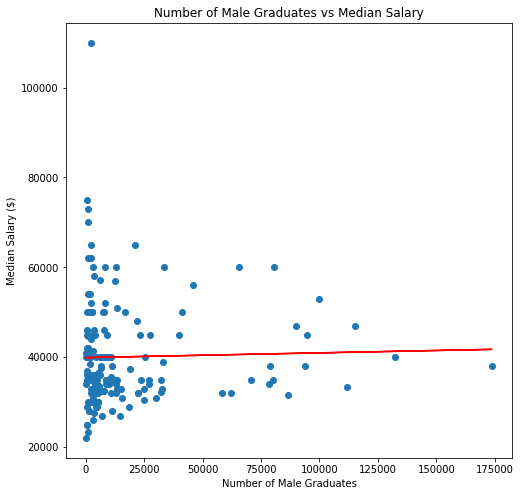

In [413]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(grad_data.loc[:, 'Men'], grad_data.loc[:, 'Median'])
ax.set_xlabel('Number of Male Graduates')
ax.set_title('Number of Male Graduates vs Median Salary')
ax.set_ylabel('Median Salary ($)')
ax.plot(grad_data.loc[:, 'Men'], y_pred(grad_data.loc[:, 'Men'], grad_data.loc[:, 'Median']), 'r')

In [414]:
R_squared(grad_data.loc[:, 'Men'], grad_data.loc[:, 'Median'])

0.07 % of the variation in y can be explained using X


It would appear from the scatterplot that majors occupied by smaller amounts of Men contain both the highest and lowest average earners. Though there is not a strong relationship between the columns, it would appear that the correlation is slightly positive, suggesting majors with higher amounts of men on average earn more.

Next, we will plot the Number of Female Graduates vs Median Salary:

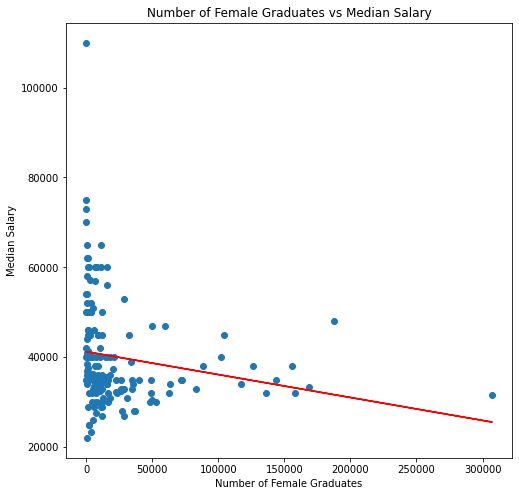

In [415]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(grad_data.loc[:, 'Women'], grad_data.loc[:, 'Median'])
ax.set_xlabel('Number of Female Graduates')
ax.set_title('Number of Female Graduates vs Median Salary')
ax.set_ylabel('Median Salary')
ax.plot(grad_data.loc[:, 'Women'], y_pred(grad_data.loc[:, 'Women'], grad_data.loc[:, 'Median']), 'r')

In [416]:
R_squared(grad_data.loc[:, 'Women'], grad_data.loc[:, 'Median'])

3.34 % of the variation in y can be explained using X


Similar to the Men vs Median salary scatterplot, it would appear that majors occupied by smaller amounts of Women contain both the highest and lowest average earners. One interesting distinction we see is the stronger negative correlation between having a higher number of women in a major and a lower average salary. Granted, the correlation is not extremely strong, but it is roughly 47 times stronger than the correlation between the amount of Male Graduates and the Average Median Salary.

Neither of the two last plots have given us significant insight regarding our objective of discovering the relationship between gender and average income. Perhaps magnitude of gender is not the metric we need. Rather, the ratio of gender compared with average income may be more telling. To investigate this, we will next plot and analyze a comparison of the percentage of Women in a field versus the Median salary:

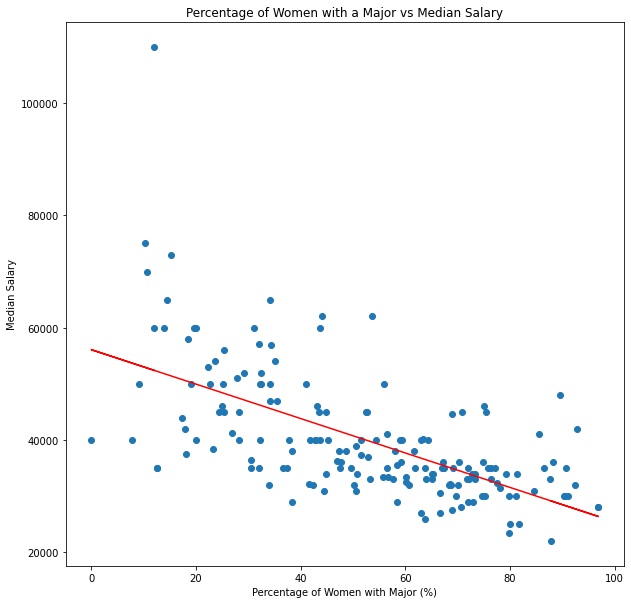

In [417]:
grad_data.loc[:, 'ShareWomen'] = grad_data.loc[:, 'ShareWomen'] * 100
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'Median'])
ax.set_xlabel('Percentage of Women with Major (%)')
ax.set_title('Percentage of Women with a Major vs Median Salary')
ax.set_ylabel('Median Salary')
ax.plot(grad_data.loc[:, 'ShareWomen'], y_pred(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'Median']), 'r')

In [418]:
R_squared(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'Median'])

38.28 % of the variation in y can be explained using X


We multiplied the 'ShareWomen' column by 100 so it can be read more clearly as a percentage. As we can see, there is a much clearer relationship on display here than the past two plots. The data shows that a major with a larger percentage of women, typically, has a lower median salary. This also directly implies the inverse, that majors with higher percentages of men have higher average earnings.

Exploring the income situation for women further, we will next establish a new column, 'low_income_percentage' which is defined as the number in low-wage service jobs divided by the total number of people with the major (multipled by 100 to be read more clearly as a percentage). We will compare this column with the 'ShareWomen' column below:

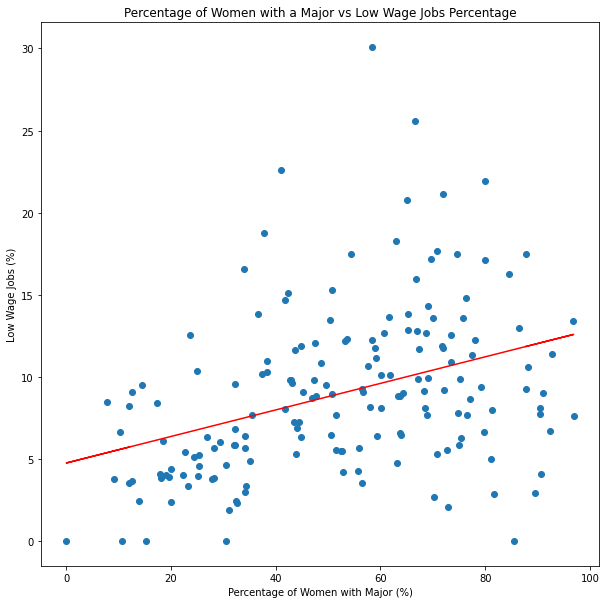

In [419]:
grad_data.loc[:, 'low_income_percentage'] = 100 * (grad_data.loc[:, 'Low_wage_jobs'] / grad_data.loc[:, 'Total'])
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'low_income_percentage'])
ax.set_xlabel('Percentage of Women with Major (%)')
ax.set_title('Percentage of Women with a Major vs Low Wage Jobs Percentage')
ax.set_ylabel('Low Wage Jobs (%)')
ax.plot(grad_data.loc[:, 'ShareWomen'], y_pred(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'low_income_percentage']), 'r')

In [420]:
R_squared(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'low_income_percentage'])

13.63 % of the variation in y can be explained using X


This comparison shows a positive correlation between majors that have higher percentages of women containing more low wage jobs as a percentage of the total amount of people with the major. 

We have established a connection between higher percentages of women in a major, lower median salary, and higher amounts of low income jobs. To take this a step further, we will next plot the Share of Women vs the Unemployment Percentage.

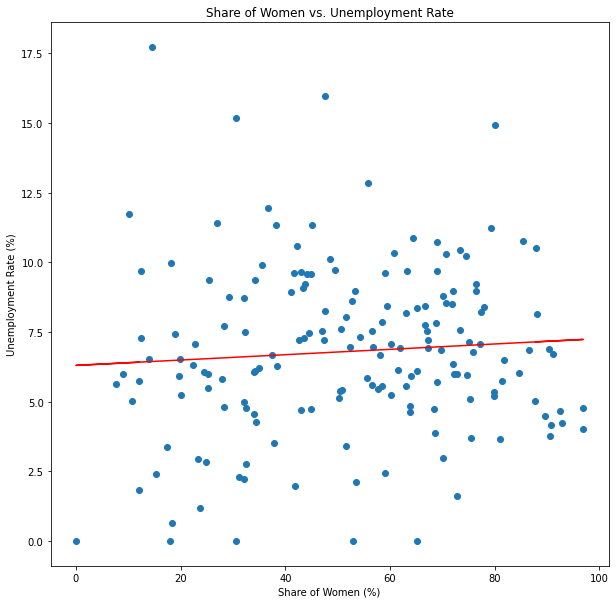

In [421]:
grad_data.loc[:, 'Unemployment_rate'] = 100 * grad_data.loc[:, 'Unemployment_rate']
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Share of Women (%)')
ax.set_title('Share of Women vs. Unemployment Rate')
ax.set_ylabel('Unemployment Rate (%)')
ax.scatter(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'Unemployment_rate'])
ax.plot(grad_data.loc[:, 'ShareWomen'], y_pred(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'Unemployment_rate']), 'r')

In [422]:
R_squared(grad_data.loc[:, 'ShareWomen'], grad_data.loc[:, 'Unemployment_rate'])

0.54 % of the variation in y can be explained using X


There is a fairly even distribution across the spectrum of unemployment rate correlated with the percentage of women involved. No clear relationship exists that can be seen in this direct compare.

From our analysis on the relationship in this dataset between gender and average income, we see a trend of women being in a less favorable financial position when compared to men. It would be interesting to see a breakdown of salaries reported from each major by anonymous individuals to see how deep the disparity is between men and women from this study and to see if this has held true since 2012.

<a id="6"></a>
### Analyzing the Connection Between Major Type, Employment Status, and Average income
Now we will move onto our final objective for this analysis: Analyzing the connection between Major Category, Employment Status, and Average income. To accomplish this, we will narrow in on the following columns from the dataset:

- __Major_category__ - Category of major from Carnevale et al
- __Total__ - Total number of people with major
- __Sample_size__ - Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
- __Employed__ - Number employed (ESR == 1 or 2)
- __Full_time__ - Employed 35 hours or more
- __Part_time__ - Employed less than 35 hours
- __Full_time_year_round__ - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
- __Unemployed__ - Number unemployed (ESR == 3)
- __Unemployment_rate__ - Unemployed / (Unemployed + Employed)
- __Median__ - Median earnings of full-time, year-round workers
  
We will take a number of steps to visualize the relationships:
1. [Let's start by building a new dataframe centered around major categories, this will contain aggregations of the data from each major that is in a particular major category. These aggregations will contain:](#3-1)
    - sums of pertinent magnitude based data from our grad_data dataframe ('Total', 'Sample_size', 'Employed', 'Full_time', 'Part_time', 'Full_time_year_round', 'Unemployed')
    - means of percent based data from our 'grad_data' dataframe ('Median' and 'Unemployment_rate')
    - synthesized percentages from the new magnitudes divided by the new totals
    - We will then display all new rows of our dataframe and associated statistical information
2. [We will then display the breakdown of the different metrics of the Major Categories, including:](#3-2)
    - The count of majors in each Major Category
    - The frequency distribution of Median Salaries
    - The side-by-side view of Median Salary by Major Category
3. [Next we will explore the connection between Unemployment Rate and Median Salaries Across the Major Categories](#3-3)
4. [Finally we will explore Full-Time Employment, Part-Time Employment, and Median Salary Comparison across Major Categories](#3-4)

<a id="3-1"></a>
### Building The Major Categories Dataframe

In [423]:
maj_cat_list = grad_data.loc[:, 'Major_category'].unique()
maj_cat_temp = {}
relevant_columns_sum = ['Total', 'Sample_size', 'Employed', 'Full_time', 'Part_time', 'Full_time_year_round', 'Unemployed']
relevant_columns_percent = ['Full_time', 'Part_time', 'Full_time_year_round']
relevant_columns_mean = ['Median', 'Unemployment_rate']

for m in maj_cat_list:
    maj_cat_temp[m] = grad_data.loc[grad_data.loc[:, 'Major_category'] == m, 'Major_category'].count()

major_category_series = pd.Series(maj_cat_temp)
major_category_df = pd.DataFrame(major_category_series, columns=['count'])

for c in relevant_columns_mean:
    for m in major_cat_list:
        maj_cat_temp[m] = grad_data.loc[grad_data.loc[:, 'Major_category'] == m, c].mean()
    temp_series = pd.Series(maj_cat_temp)
    major_category_df[c] = temp_series
    
for c in relevant_columns_sum:
    for m in major_cat_list:
        maj_cat_temp[m] = grad_data.loc[grad_data.loc[:, 'Major_category'] == m, c].sum()
    temp_series = pd.Series(maj_cat_temp)
    major_category_df[c] = temp_series
    
for c in relevant_columns_percent:
    for m in major_cat_list:
        maj_cat_temp[m] = grad_data.loc[grad_data.loc[:, 'Major_category'] == m, c].sum() / major_category_df.loc[m, 'Total'] * 100
    temp_series = pd.Series(maj_cat_temp)
    percent_name = c + '_percent'
    major_category_df[percent_name] = temp_series
    
major_category_df.head(16)

,count,Median,Unemployment_rate,Total,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Full_time_percent,Part_time_percent,Full_time_year_round_percent
Engineering,29,57382.758621,6.333388,537583.0,4926,420372,381867,85136,288952,29817,71.034054,15.836810,53.750212
Business,13,43538.461538,7.106354,1302376.0,15505,1088742,988870,196936,790425,79877,75.928150,15.121286,60.690999
Physical Sciences,10,41890.000000,4.651108,185479.0,1137,139231,112852,43444,85635,7880,60.843546,23.422598,46.169647
Law & Public Policy,5,42200.000000,9.080476,179107.0,1935,144790,126940,38213,100454,13495,70.873835,21.335291,56.086027
Computers & Mathematics,11,42745.454545,8.425599,299008.0,2860,237894,207545,53270,159156,18373,69.411186,17.815577,53.228007
Industrial Arts & Consumer Services,7,36342.857143,4.807134,229792.0,2165,189043,151383,61122,114179,11526,65.878273,26.598837,49.687979
Arts,8,33062.500000,9.017270,357130.0,3260,288114,207773,114791,153111,28228,58.178534,32.142637,42.872623
Health,12,36825.000000,6.592017,463230.0,3914,372147,294819,114592,228418,22213,63.644194,24.737603,49.309846
Social Science,9,37344.444444,9.572883,529966.0,4581,401493,347141,121569,255219,42975,65.502504,22.939019,48.157618
Biology & Life Science,14,36421.428571,6.091776,453862.0,2317,302797,240377,116736,165802,22854,52.962575,25.720593,36.531369


In [424]:
major_category_df.describe()

,count,Median,Unemployment_rate,Total,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Full_time_percent,Part_time_percent,Full_time_year_round_percent
count,16.000000,16.000000,16.000000,1.600000e+01,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,10.750000,37920.459332,6.998562,4.232284e+05,3847.875000,3.370749e+05,281282.000000,95430.250000,212837.562500,26105.437500,65.776140,23.441567,49.714401
std,6.329824,6602.823053,1.571530,3.022061e+05,3469.589118,2.497598e+05,224300.954534,59254.599581,177591.222758,19691.569763,6.382856,4.794378,6.182316
min,1.000000,30100.000000,4.651108,1.229600e+04,128.000000,9.821000e+03,8032.000000,3173.000000,6234.000000,749.000000,52.962575,15.121286,36.531369
25%,7.750000,34140.625000,5.864253,2.187138e+05,2107.500000,1.779798e+05,145272.250000,50813.500000,110747.750000,13002.750000,60.653231,21.115856,45.963089
50%,9.500000,36382.142857,7.096223,4.232315e+05,3220.000000,3.167285e+05,256853.500000,102204.500000,190015.000000,23911.500000,65.690388,23.180808,50.193697
75%,13.250000,41967.500000,8.181971,5.318702e+05,4621.250000,4.062128e+05,355822.500000,120837.000000,263422.000000,30685.750000,70.913890,26.003564,53.954244
max,29.000000,57382.758621,9.572883,1.302376e+06,15505.000000,1.088742e+06,988870.000000,214030.000000,790425.000000,79877.000000,75.928150,32.142637,60.690999


<a id="3-2"></a>
### Breakdown of Major Categories and Associated Median Salaries

Text(0.5, 0.98, 'Count by Major Category')

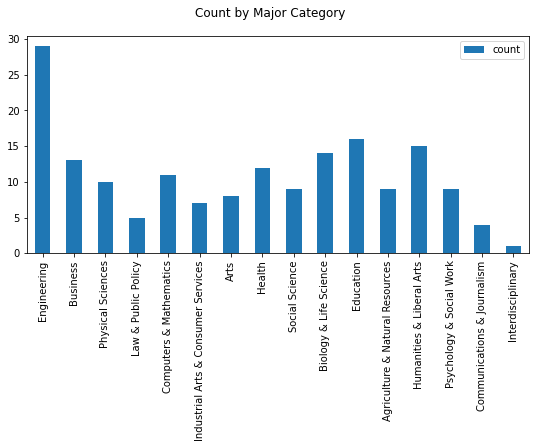

In [425]:
major_category_df.plot(y='count', kind='bar', figsize=(9,4))
plt.suptitle('Count by Major Category')

There are 16 Major Categories with 172 Majors from our 'grad_data' dataframe that supplied the numbers for our 'count' column for the 'major_categories_df' dataframe. We can see Engineering majors have the largest amount of majors that were included in the study with 29 in total. This higher-up view should give us a better sense of outcomes with more reliability as we are looking at a larger sample size than individual majors.

Text(0.5, 0.98, 'Frequency Distribution of Median Salary ($)')

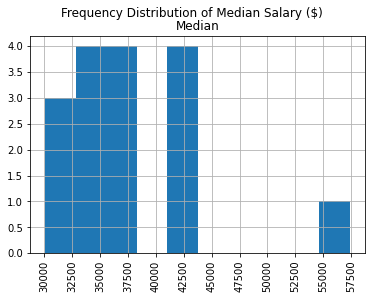

In [426]:
major_category_df.hist('Median', bins=10)
plt.xticks(np.arange(30000, 60000, step=2500), rotation=90)
plt.suptitle('Frequency Distribution of Median Salary ($)')

We can see the majority (11) of Median Salaries for Major Categories lie in the 30000 to 37500 dollar range. Four sit in the 40000 to 45000 dollar range. One outlier sits above the 55000 dollar line. Now we will look at the side-by-side breakdown of Median Salary information across the Major Categories. 

Text(0.5, 0.98, 'Major Categories by Median Salary ($)')

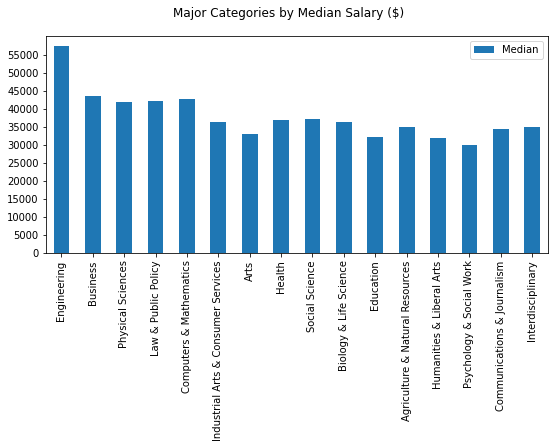

In [427]:
major_category_df.plot(y='Median', kind='bar', figsize=(9,4))
plt.yticks(np.arange(0, 60000, step=5000))
plt.suptitle('Major Categories by Median Salary ($)')

We can see Engineers from this dataset, on average, clearly make more than any other major category. Business, Computers & Mathematics, Law & Public Policy, and Physical Sciences are all in the second tier (40000 to 45000 dollars). Five major categories came in under 35000 dollars: Arts, Education, Humanities & Liberal Arts, Communications & Journalism, and Psychology & Social Work with the latter having the lowest average of 30100 dollars.

<a id="3-3"></a>
### Unemployment Rate and Median Salary Across Major Categories
Now as we recall, our goal here is to analyze the connection between Major Category, Employment Status, and Average income, let us start by visualizing the relationship between Unemployment Rate and Median Salary for these 16 data points.

Text(0, 0.5, 'Median Salary ($)')

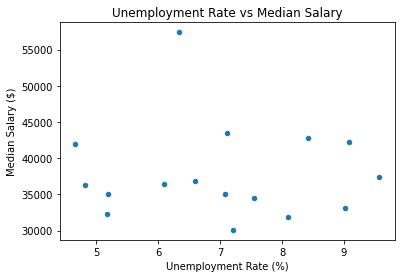

In [428]:
major_category_df.plot(x='Unemployment_rate', y='Median', kind='scatter', title='Unemployment Rate vs Median Salary')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Median Salary ($)')

In [429]:
R_squared(major_category_df['Unemployment_rate'], major_category_df['Median'])

0.2 % of the variation in y can be explained using X


We can see from the scatterplot as well as from our coefficient of determination that there is no strong pattern here. We can still assess strength, to a degree, of a Major Category in terms of employability (refers to the attributes of a person that make that person able to gain and maintain employment) and standard of living (the degree of wealth and material comfort available to a person) by stacking Unemployment Rate and Median Salary side by side and comparing between them. We will do just that below. 

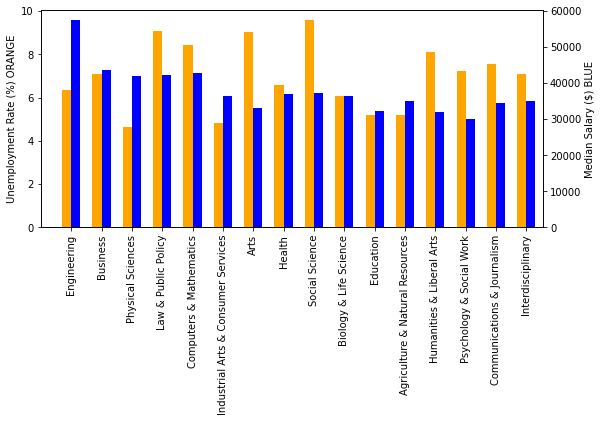

In [430]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot() 
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

major_category_df.Unemployment_rate.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
major_category_df.Median.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Unemployment Rate (%) ORANGE')
ax2.set_ylabel('Median Salary ($) BLUE')

plt.xlim(-1)
plt.show()

Here we can see the unemployment rate (orange) stacked up with the median salary (blue) along with the associated major along the x-axis. We can likely agree that a higher Median Salary and lower Unemployment Rate would both be positive indicators for a particular Major Category. With that in mind, the main observations that stick out are:
- Engineering and Physical Science look to be the strongest for employability and standard of living
- Arts, Social Science, Humanities & Liberal Arts, and Psychology & Social Work categories look to be the weakest

We can create a new bar-plot containing the ratio between the two columns to quantify this relationship and make our observations clearer below.

Text(0.5, 0.98, 'Ratio of Median Salary to Unemployment Rate')

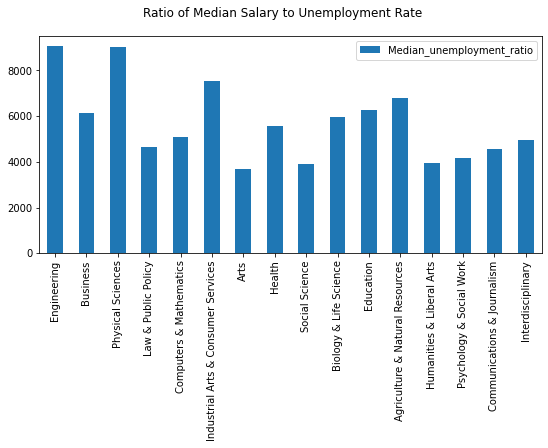

In [431]:
major_category_df['Median_unemployment_ratio'] = major_category_df['Median'] / major_category_df['Unemployment_rate']
major_category_df.plot(y = 'Median_unemployment_ratio', kind='bar', figsize=(9,4))
plt.suptitle('Ratio of Median Salary to Unemployment Rate')

Confirmed by our bar graph, Engineering and Physical Sciences have the highest ratio of Median Salary to Unemployment rate with Industrial Arts & Consumer Services not too far behind. Meanwhile the four categories mentioned above have the lowest ratio with Law & Public Policy also close to their tier.

<a id="3-4"></a>
### Full-Time Employment, Part-Time Employment, and Median Salary Comparison Across Major Categories
Next we will compare full-time versus part-time employment along with the associated median salaries of the major categories. For context, in many cases, part-time workers want full-time jobs but are working only part-time hours. Involuntary part-time workers are not only earning less income than they would prefer, but usually do not receive benefits such as health insurance, sick leave, holiday pay or vacations. This creates a less stable work situation with more risk if something happens to a part-time worker or their family. From this we could establish an assumption that higher part-time work means less stability, and that paired with lower average salary, means more financial risk.

Utilizing the scatterplot below, we can also visualize the relationship between part-time work percentage and Median salary independent of major category.

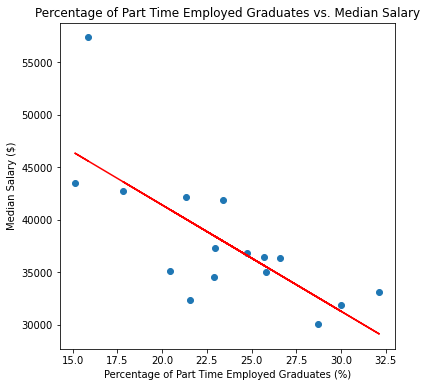

In [432]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('Percentage of Part Time Employed Graduates (%)')
ax.set_title('Percentage of Part Time Employed Graduates vs. Median Salary')
ax.set_ylabel('Median Salary ($)')
ax.scatter(major_category_df.loc[:, 'Part_time_percent'], major_category_df.loc[:, 'Median'])
ax.plot(major_category_df.loc[:, 'Part_time_percent'], y_pred(major_category_df.loc[:, 'Part_time_percent'], major_category_df.loc[:, 'Median']), 'r')

In [433]:
R_squared(major_category_df.loc[:, 'Part_time_percent'], major_category_df.loc[:, 'Median'])

54.13 % of the variation in y can be explained using X


We can see from the scatterplot and the coefficient of determination, there is a relatively strong correlation in this dataset between a higher percentage of part-time employees and having a lower Median Salary. This strengthens the assumption that these factors are connected indicators of job stability and financial risk.

With that we will compare Full-time employment percentage, Part-time employment percentage, and Median Salary across Major Categories using a bar graph below.

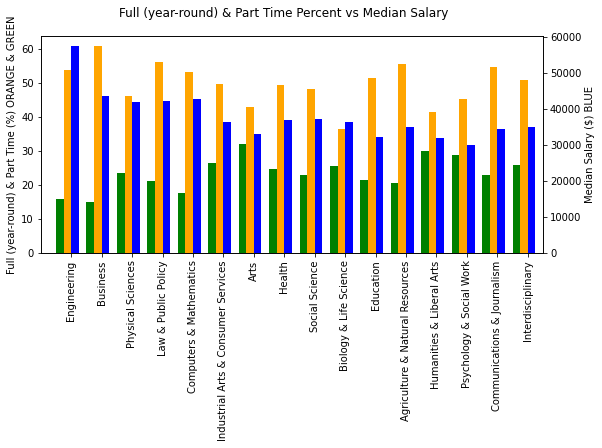

In [434]:
fig = plt.figure(figsize=(9,4)) 
ax = fig.add_subplot() 
ax2 = ax.twinx()

width = 0.25

major_category_df.Full_time_year_round_percent.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
major_category_df.Part_time_percent.plot(kind='bar', color='green', ax=ax, width=width, position=2)
major_category_df.Median.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Full (year-round) & Part Time (%) ORANGE & GREEN')
ax2.set_ylabel('Median Salary ($) BLUE')

plt.suptitle('Full (year-round) & Part Time Percent vs Median Salary')
plt.xlim(-1)
plt.show()

We are operating under the assumption that positive indicators of job stability and less financial risk are as follows: higher Full-time employment, lower part-time employment, and higher Median Salary.

The average Full-time percentage for the major categories is 49.71%. Major categories that are above this line are Engineering, Business, Law & Public Policy, Computers & Mathematics, Education, Agriculture & Natural Resources, Communications & Journalism, and Interdisciplinary.

The average Part-time percentage for the major categories is 23.44%. Major categories that are below this line are Engineering, Business, Physical Sciences, Law & Public Policies, Computers & Mathematics, Social Science, Education, Agriculture & Natural Resources, and Communications & Journalism.

The Median Salary for the major categories is 37920.46 dollars. Major categories that are above this line are Engineering, Business, Physical Sciences, Law & Public Policy, Computers & Mathematics.

The major categories that meet all three of these criteria, and are therefore paths to more stable outcomes on average are Engineering, Business, Computers & Mathematics, and Law & Public Policy.

The major categories that don't meet any of the criteria and are therefore paths to less stable outcomes on average are Psychology & Social Work, Humanities & Liberal Arts, Biology & Life Science, Health, Arts, and Industrial Arts & Consumer Services.


<a id="7"></a>
## Conclusions
In this analysis, we utilized data pertaining to employment outcomes for college students who graduated between years 2010 - 2012 in the United States to help us find relevant patterns around our objectives.

What did we find? Here is a re-cap of the key assumptions and observations found for each objective:
- Discovering if students in more popular majors have higher average incomes:
    - Popularity, was defined as a large magnitude of people practicing a particular major. A major with a higher total number of graduates was to be considered more popular. We utilized the 'Total' and 'Sample_size' columns to help us gauge this across majors.
    - There was no discernible relationship between higher popularity of a major and its reported median salaries.
    - The top 20 majors (roughly the top 10%) in terms of popularity based on sample size magnitude had an average salary of 39345 dollars which was below average for the dataset (40076 dollars).
    - 8/10 of the top 10 majors ordered by rank of median salary are Engineering degrees. It would make sense that more technically difficult majors would yield higher average pay and have less graduates than less difficult majors. 
- Exploring the relationship between gender and average income:
    - There was a relatively strong relationship between a larger percentage of women in a major yielding a lower Median Salary and higher percentage of Low-Wage jobs, but not a higher unemployment rate. This implies the inverse for the share of men in a major for Median Salary and Low-wage jobs percentage.
- Analyzing the connection between major type, employment status, and average income:
    - There is a strong relationship between a higher part-time work percentage and lower Median salary, independent of major category.
    - Using Unemployment Rate and Median Salary to guide as metrics for Employability and Standard of Living:
        - Engineering and Physical Science look to provide the strongest employability and standard of living outcomes.
        - Arts, Social Science, Humanities & Liberal Arts, and Psychology & Social Work categories provide the weakest employability and standard of living outcomes.
    - Operating under the assumption that positive indicators of job stability and less financial risk are higher Full-time employment percentage, lower Part-time employment percentage, and higher Median Salary:
        - Engineering, Business, Computers & Mathematics, and Law & Public Policy were above average on all three criteria and therefore provided the most stable and least financially risky job outcomes.
        - Psychology & Social Work, Humanities & Liberal Arts, Biology & Life Science, Health, Arts, and Industrial Arts & Consumer Services were below average on all three criteria and therefore the weakest in providing a stable and financially risk adverse outcome for graduates.
    - Engineering provides the best all-around average outcome for its graduates. This Major Category not only yielded the highest average salary (by over 20%), but stood out as having the highest employability, job stability, and least financial risk.
    - Arts, Humanities & Liberal Arts, and Psychology & Social Work were in the bottom tier in terms of average employability, standard of living, stability, and financial risk outcomes for graduates.